In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction
Hello, my name is Tahir Mehmood, and I am a data analyst with a passion for transforming raw data into actionable insights. With a strong background in statistical analysis and data visualization, I thrive on uncovering trends and patterns that help drive informed decision-making. I enjoy collaborating with cross-functional teams to address complex challenges and deliver meaningful solutions. My goal is to leverage data to create impactful strategies that support organizational growth and innovation.

Freely Connect with me: https://www.linkedin.com/in/tahir-mehmood0/

# Data Discription
This data split into 3 groups

- female_population.csv   ->  Contains Female Population Data Across Difference Countries Over the Years up to 2023
- male_population.csv     ->  Contains Male Population Data Across Difference Countries Over the Years up to 2023
- total_population.csv    ->  Contains Total Population Data Across Difference Countries Over the Years up to 2023


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
female_filename = '/kaggle/input/population-contries-gender/female_population.csv'
male_filename = '/kaggle/input/population-contries-gender/male_population.csv'
total_filename = '/kaggle/input/population-contries-gender/total_population.csv'

In [4]:
female_data = pd.read_csv(female_filename)
male_data = pd.read_csv(male_filename)
total_data = pd.read_csv(total_filename)

## Columns

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

# Issues with datasets
1. **Dirty Data:**
   
   - Every Year Population have missing value.
   - We need to melt data so that we easily apply visulization and we need to merge data
   

In [6]:
female_data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64

In [7]:
male_data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64

In [8]:
total_data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64

In [9]:
male_data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02
mean,5.799907e+07,5.879362e+07,5.987629e+07,6.122232e+07,6.257949e+07,6.395259e+07,6.538605e+07,6.681817e+07,6.829283e+07,6.982385e+07,...,1.483592e+08,1.502928e+08,1.522153e+08,1.541338e+08,1.560190e+08,1.578576e+08,1.596246e+08,1.612072e+08,1.626466e+08,1.642895e+08
std,1.830176e+08,1.852462e+08,1.885904e+08,1.929537e+08,1.973381e+08,2.017763e+08,2.064612e+08,2.111256e+08,2.159419e+08,2.209658e+08,...,4.658210e+08,4.714575e+08,4.770226e+08,4.825726e+08,4.879708e+08,4.931864e+08,4.981298e+08,5.025149e+08,5.063473e+08,5.107310e+08
min,1.258000e+03,1.389000e+03,1.540000e+03,1.702000e+03,1.873000e+03,2.054000e+03,2.245000e+03,2.451000e+03,2.655000e+03,2.667000e+03,...,5.580000e+03,5.617000e+03,5.609000e+03,5.598000e+03,5.613000e+03,5.654000e+03,5.702000e+03,5.755000e+03,5.799000e+03,5.835000e+03
25%,2.498010e+05,2.533402e+05,2.571170e+05,2.616788e+05,2.736948e+05,2.837320e+05,2.807952e+05,2.824872e+05,2.869172e+05,2.894492e+05,...,8.572020e+05,8.801910e+05,8.867600e+05,8.933670e+05,8.963190e+05,8.921560e+05,8.925920e+05,8.902370e+05,8.839260e+05,9.029610e+05
50%,1.838656e+06,1.895981e+06,1.939969e+06,1.978382e+06,2.011330e+06,2.041456e+06,2.072671e+06,2.104024e+06,2.151548e+06,2.208522e+06,...,5.170017e+06,5.182914e+06,5.195724e+06,5.269584e+06,5.232447e+06,5.254476e+06,5.248072e+06,5.246680e+06,5.285164e+06,5.362319e+06
75%,1.340071e+07,1.379332e+07,1.420430e+07,1.463027e+07,1.505867e+07,1.532477e+07,1.546926e+07,1.563473e+07,1.580378e+07,1.598163e+07,...,2.946011e+07,2.945217e+07,2.943353e+07,2.942694e+07,2.940895e+07,2.956344e+07,3.047545e+07,3.141765e+07,3.237093e+07,3.292789e+07
max,1.514882e+09,1.535333e+09,1.562702e+09,1.596326e+09,1.630166e+09,1.664271e+09,1.699558e+09,1.734631e+09,1.770759e+09,1.808331e+09,...,3.682163e+09,3.726117e+09,3.769713e+09,3.812784e+09,3.854708e+09,3.895178e+09,3.933647e+09,3.966359e+09,3.996841e+09,4.032764e+09


In [10]:
male_data.duplicated().sum()

0

# Data Cleaning

**Missing Values**

    1. Check the country name that have missing values.
        There is a country with name Not Classified have all missing values. So drop this row.
    2. Check another missing values
        There is a country with name West Bank and Gaza that have half missing values. May be country not made in 1960. So the missing values fill with 0

In [11]:
male_data_copy = male_data.copy()
female_data_copy = female_data.copy()
total_data_copy = total_data.copy()

**Check Country Name of Missing Data**

Result: We can see that their is a country with name Not Classified. We can remove this row.

In [12]:
male_data_copy[male_data_copy['1960'].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
110,Not classified,INX,"Population, male",SP.POP.TOTL.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,PSE,"Population, male",SP.POP.TOTL.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2078224.0,2125660.0,2173706.0,2217868.0,2275925.0,2334948.0,2394860.0,2455361.0,2516444.0,2578229.0


In [13]:
male_data_copy.drop(110,inplace=True)

In [14]:
female_data_copy[female_data_copy['1960'].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
110,Not classified,INX,"Population, female",SP.POP.TOTL.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,PSE,"Population, female",SP.POP.TOTL.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2095174.0,2144431.0,2193382.0,2236936.0,2293162.0,2350358.0,2408409.0,2467389.0,2527169.0,2587546.0


In [15]:
female_data_copy.drop(110,inplace=True)

In [16]:
total_data_copy[total_data_copy['1960'].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0,5043612.0,5165775.0


In [17]:
total_data_copy.drop(110,inplace=True)

In [18]:
total_data_copy[total_data_copy['1960'].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0,5043612.0,5165775.0


In [19]:
male_data_copy.fillna(0,inplace=True)

In [20]:
female_data_copy.fillna(0,inplace=True)

In [21]:
total_data_copy.fillna(0,inplace=True)

**Check Data**

In [22]:
male_data_copy.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64

**Now to melt dataframes to get correct format**

In [23]:
merged_data = pd.melt(
    male_data_copy,
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Male Population'
)
merged_data

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Male Population
0,Aruba,ABW,"Population, male",SP.POP.TOTL.MA.IN,1960,26834.0
1,Africa Eastern and Southern,AFE,"Population, male",SP.POP.TOTL.MA.IN,1960,64839355.0
2,Afghanistan,AFG,"Population, male",SP.POP.TOTL.MA.IN,1960,4476521.0
3,Africa Western and Central,AFW,"Population, male",SP.POP.TOTL.MA.IN,1960,48453387.0
4,Angola,AGO,"Population, male",SP.POP.TOTL.MA.IN,1960,2686966.0
...,...,...,...,...,...,...
16955,Kosovo,XKX,"Population, male",SP.POP.TOTL.MA.IN,2023,875360.0
16956,"Yemen, Rep.",YEM,"Population, male",SP.POP.TOTL.MA.IN,2023,17396462.0
16957,South Africa,ZAF,"Population, male",SP.POP.TOTL.MA.IN,2023,29451976.0
16958,Zambia,ZMB,"Population, male",SP.POP.TOTL.MA.IN,2023,10148862.0


In [24]:
female_df_melted = pd.melt(
    female_data_copy,
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Female Population'
)
female_df_melted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Female Population
0,Aruba,ABW,"Population, female",SP.POP.TOTL.FE.IN,1960,27773.0
1,Africa Eastern and Southern,AFE,"Population, female",SP.POP.TOTL.FE.IN,1960,65853220.0
2,Afghanistan,AFG,"Population, female",SP.POP.TOTL.FE.IN,1960,4145945.0
3,Africa Western and Central,AFW,"Population, female",SP.POP.TOTL.FE.IN,1960,48802898.0
4,Angola,AGO,"Population, female",SP.POP.TOTL.FE.IN,1960,2670229.0
...,...,...,...,...,...,...
16955,Kosovo,XKX,"Population, female",SP.POP.TOTL.FE.IN,2023,881015.0
16956,"Yemen, Rep.",YEM,"Population, female",SP.POP.TOTL.FE.IN,2023,17053363.0
16957,South Africa,ZAF,"Population, female",SP.POP.TOTL.FE.IN,2023,30962518.0
16958,Zambia,ZMB,"Population, female",SP.POP.TOTL.FE.IN,2023,10420876.0


In [25]:
merged_data['Female Population'] = female_df_melted['Female Population']

In [26]:
merged_data['Total Population'] = merged_data['Male Population'] + merged_data['Female Population']

In [27]:
merged_data

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Male Population,Female Population,Total Population
0,Aruba,ABW,"Population, male",SP.POP.TOTL.MA.IN,1960,26834.0,27773.0,54607.0
1,Africa Eastern and Southern,AFE,"Population, male",SP.POP.TOTL.MA.IN,1960,64839355.0,65853220.0,130692575.0
2,Afghanistan,AFG,"Population, male",SP.POP.TOTL.MA.IN,1960,4476521.0,4145945.0,8622466.0
3,Africa Western and Central,AFW,"Population, male",SP.POP.TOTL.MA.IN,1960,48453387.0,48802898.0,97256285.0
4,Angola,AGO,"Population, male",SP.POP.TOTL.MA.IN,1960,2686966.0,2670229.0,5357195.0
...,...,...,...,...,...,...,...,...
16955,Kosovo,XKX,"Population, male",SP.POP.TOTL.MA.IN,2023,875360.0,881015.0,1756375.0
16956,"Yemen, Rep.",YEM,"Population, male",SP.POP.TOTL.MA.IN,2023,17396462.0,17053363.0,34449825.0
16957,South Africa,ZAF,"Population, male",SP.POP.TOTL.MA.IN,2023,29451976.0,30962518.0,60414494.0
16958,Zambia,ZMB,"Population, male",SP.POP.TOTL.MA.IN,2023,10148862.0,10420876.0,20569738.0


In [28]:
merged_data[merged_data['Male Population'].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Male Population,Female Population,Total Population


In [31]:
sns.set(style='whitegrid')

In [35]:
top_5_2023 = merged_data[merged_data['Year'] == '2023'].nlargest(5, 'Total Population')

In [38]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


# Data Visualization

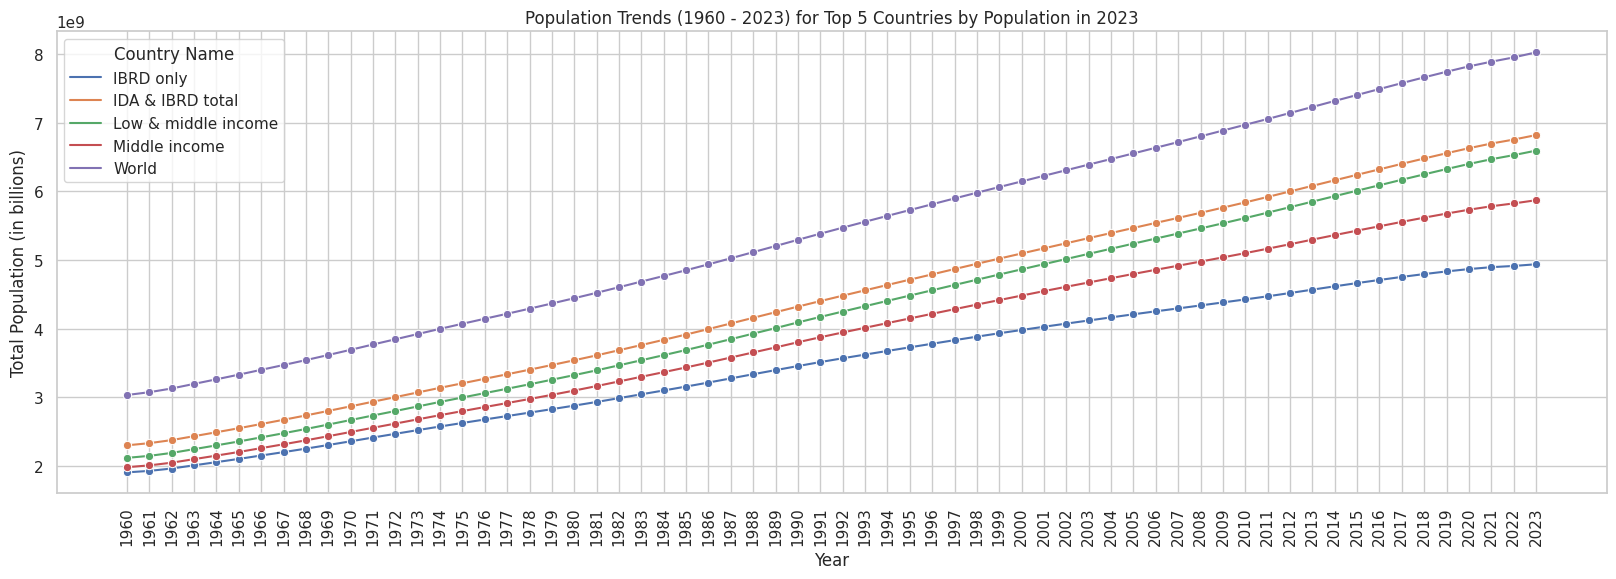

In [41]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=merged_data[merged_data['Country Name'].isin(top_5_2023['Country Name'])],
             x='Year', y='Total Population', hue='Country Name', marker='o')
plt.title('Population Trends (1960 - 2023) for Top 5 Countries by Population in 2023')
plt.xlabel('Year')
plt.ylabel('Total Population (in billions)')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

In [49]:
top_10_2023 = merged_data[merged_data['Year'] == '2023'].nlargest(10, 'Total Population').reset_index(drop=True)

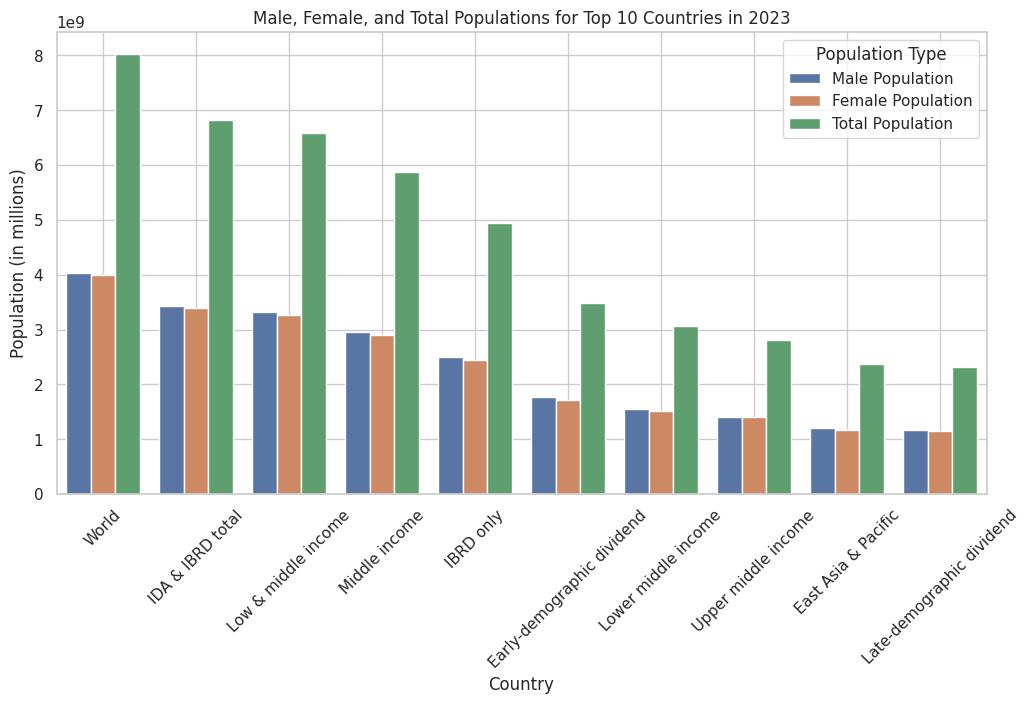

In [45]:
top_10_melted = pd.melt(top_10_2023, 
                        id_vars=['Country Name'], 
                        value_vars=['Male Population', 'Female Population', 'Total Population'],
                        var_name='Population Type', value_name='Population')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_melted, x='Country Name', y='Population', hue='Population Type')
plt.title('Male, Female, and Total Populations for Top 10 Countries in 2023')
plt.xlabel('Country')
plt.ylabel('Population (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Population Type')
plt.grid(True)
plt.show()

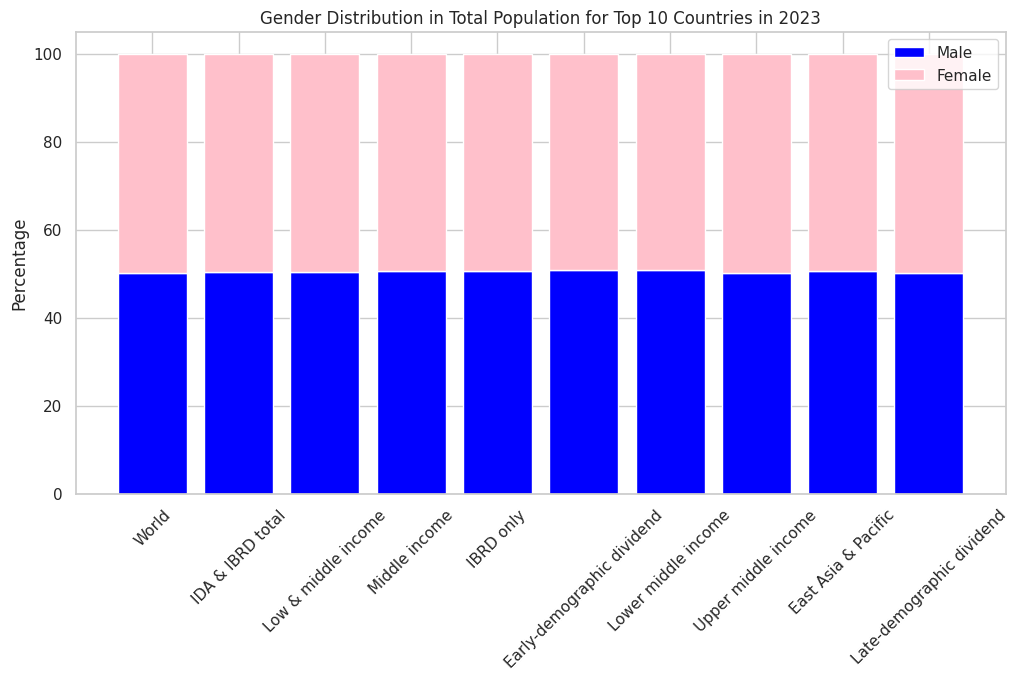

In [50]:
top_10_2023[['Male %', 'Female %']] = top_10_2023[['Male Population', 'Female Population']].div(
    top_10_2023['Total Population'], axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
for i, country in enumerate(top_10_2023['Country Name']):
    plt.bar(country, top_10_2023.loc[i, 'Male %'], label='Male' if i == 0 else "", color='blue')
    plt.bar(country, top_10_2023.loc[i, 'Female %'], bottom=top_10_2023.loc[i, 'Male %'], 
            label='Female' if i == 0 else "", color='pink')

plt.title('Gender Distribution in Total Population for Top 10 Countries in 2023')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [56]:
india_2023 = merged_data[(merged_data['Country Name'] == 'India') & (merged_data['Year'] == '2023')].reset_index(drop=True)

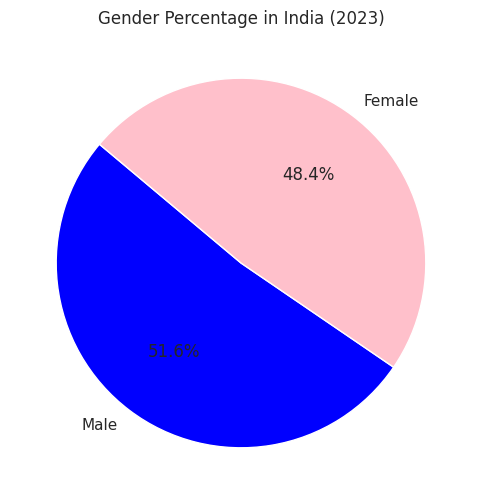

In [57]:
sizes = [india_2023['Male Population'].values[0], india_2023['Female Population'].values[0]]
labels = ['Male', 'Female']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Gender Percentage in India (2023)')
plt.show()

In [59]:
data_2023 = merged_data[merged_data['Year'] == '2023'].reset_index(drop=True)

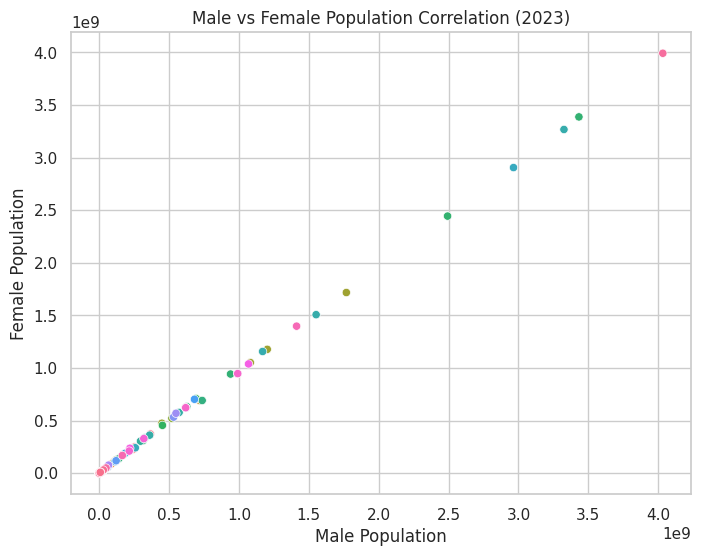

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_2023, x='Male Population', y='Female Population', hue='Country Name', legend=None)
plt.title('Male vs Female Population Correlation (2023)')
plt.xlabel('Male Population')
plt.ylabel('Female Population')
plt.grid(True)
plt.show()

In [61]:
china = merged_data[merged_data['Country Name'] == 'China'].sort_values('Year')
china['Growth Rate'] = china['Total Population'].pct_change() * 100

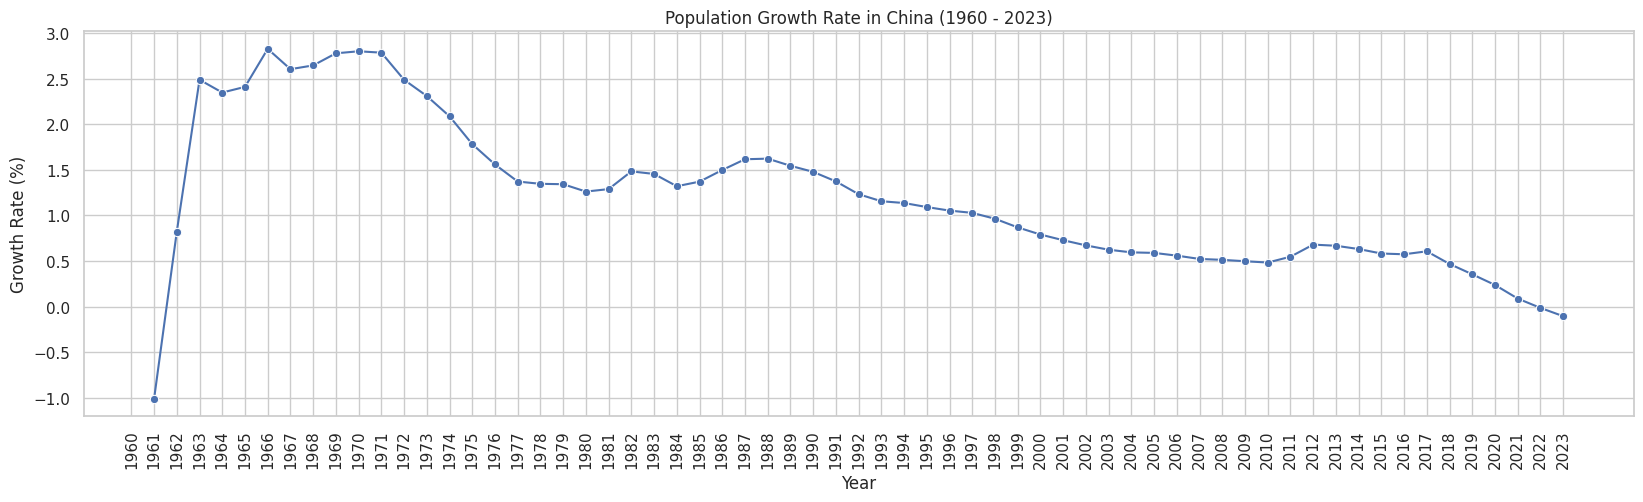

In [67]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=china, x='Year', y='Growth Rate', marker='o')
plt.title('Population Growth Rate in China (1960 - 2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()